In [3]:
import pandas as pd

# Load Group 1 data
file_path_group1 = "group1_data (2)-1.xlsx"
xls_group1 = pd.ExcelFile(file_path_group1)

# Load Group 2 data
file_path_group2 = "Group2 absolut figures-1.xlsx"
xls_group2 = pd.ExcelFile(file_path_group2)

# Display sheet names to understand the structure
xls_group1.sheet_names, xls_group2.sheet_names


(['percentchanges', 'counter_percentage_changes'],
 ['absolutfigures', 'counter_absolut_figures'])

In [4]:
# Load and preview the first few rows of each sheet
df_percentchanges = xls_group1.parse("percentchanges")
df_counter_percentchanges = xls_group1.parse("counter_percentage_changes")

df_absolutfigures = xls_group2.parse("absolutfigures")
df_counter_absolutfigures = xls_group2.parse("counter_absolut_figures")

# Display first few rows of each dataset
df_percentchanges.head(), df_counter_percentchanges.head(), df_absolutfigures.head(), df_counter_absolutfigures.head()


(                                    Bilanz                2024  \
 0                                   Assets  31.564070010959544   
 1                     Assets, Fixed assets  -19.48738461538462   
 2  Assets, Fixed assets, Intangible assets                   0   
 3       Assets, Fixed assets, Fixed assets  -19.48738461538462   
 4   Assets, Fixed assets, Financial assets                   0   
 
                  2023               2022              2021               2020  \
 0  -13752881550243000  31489924285710800  1818181818181810  -2903225806451610   
 1  -62420795976550200  30678517674815900               0.0              100.0   
 2                   0                  0                 0                  0   
 3  -62420795976550200             -100.0                 0                  0   
 4                   0                  0               0.0                0.0   
 
                 2019 2018  M&A  
 0  370.3575909090909  NaN  Yes  
 1             356.25  NaN  Yes  


In [5]:
# Convert relevant columns (years) to numeric for Group 1 percentage changes
df_percentchanges_clean = df_percentchanges.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Compute summary statistics for Group 1
summary_group1 = df_percentchanges_clean.describe().T

# Convert control group percentage changes (stored as lists) into numerical format
df_counter_percentchanges['changes'] = df_counter_percentchanges['changes'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Compute summary statistics for Control Group 1
control_changes = df_counter_percentchanges['changes'].explode().astype(float)
summary_control1 = control_changes.describe()

summary_group1, summary_control1


(       count          mean           std           min           25%  50%  \
 2024  1800.0  4.788883e+02  8.153088e+03 -7.320555e+03  0.000000e+00  0.0   
 2023  1595.0  3.591273e+14  1.418189e+16 -7.183329e+16 -1.558224e+14  0.0   
 2022  1492.0  4.551324e+14  1.272655e+16 -7.692308e+16 -1.000000e+02  0.0   
 2021  1379.0  2.825244e+14  1.350895e+16 -7.781145e+16 -1.793655e+14  0.0   
 2020  1104.0  1.821680e+14  1.369508e+16 -6.837330e+16 -7.905289e+14  0.0   
 2019   888.0  1.307650e+06  2.673519e+07 -8.756620e+02  0.000000e+00  0.0   
 2018     0.0           NaN           NaN           NaN           NaN  NaN   
 M&A      0.0           NaN           NaN           NaN           NaN  NaN   
 
                75%           max  
 2024  8.449772e+00  2.224755e+05  
 2023  2.163527e+15  7.582827e+16  
 2022  2.286925e+15  5.595306e+16  
 2021  1.750722e+15  7.158296e+16  
 2020  9.910573e+14  6.254071e+16  
 2019  4.648971e-01  5.631830e+08  
 2018           NaN           NaN  
 M&A    

In [6]:
import numpy as np

# Select relevant columns (years) and compute mean trends per financial metric
df_trends = df_percentchanges_clean.drop(columns=["M&A"]).mean(axis=1)

# Identify financial metrics with consistently increasing trends
increasing_trend_metrics = df_percentchanges.iloc[df_trends[df_trends > 0].index, 0]

# Identify financial metrics with consistently decreasing trends
decreasing_trend_metrics = df_percentchanges.iloc[df_trends[df_trends < 0].index, 0]

# Get top 5 increasing and decreasing financial metrics
top_increasing = increasing_trend_metrics.head(5).tolist()
top_decreasing = decreasing_trend_metrics.head(5).tolist()

top_increasing, top_decreasing


(['Assets',
  'Assets, Fixed assets, Financial assets',
  'Assets, Current assets, Receivables and other assets',
  'Assets, Current assets, Cash on hand, cheques, balances with credit institutions',
  'Liabilities'],
 ['Assets, Fixed assets',
  'Assets, Fixed assets, Fixed assets',
  'Assets, Current assets',
  'Assets, Accrual',
  'Liabilities, Equity (Negative Equity), Called share capital, Share capital'])

In [11]:
# Display sheet names for validation
print("Group 1 Sheets:", xls_group1.sheet_names)
print("Group 2 Sheets:", xls_group2.sheet_names)

# Display initial rows of datasets
print("Group 1 Percent Changes Data:")
print(df_percentchanges.head())
print("Group 1 Control Percent Changes Data:")
print(df_counter_percentchanges.head())
print("Group 2 Absolute Figures Data:")
print(df_absolutfigures.head())
print("Group 2 Control Absolute Figures Data:")
print(df_counter_absolutfigures.head())

# Display summary statistics
print("Summary Statistics for Group 1 Percent Changes:")
print(summary_group1)
print("Summary Statistics for Group 1 Control Changes:")
print(summary_control1)

# Display top financial metrics with trends
print("Top 5 Increasing Financial Metrics:", top_increasing)
print("Top 5 Decreasing Financial Metrics:", top_decreasing)


Group 1 Sheets: ['percentchanges', 'counter_percentage_changes']
Group 2 Sheets: ['absolutfigures', 'counter_absolut_figures']
Group 1 Percent Changes Data:
                                    Bilanz                2024  \
0                                   Assets  31.564070010959544   
1                     Assets, Fixed assets  -19.48738461538462   
2  Assets, Fixed assets, Intangible assets                   0   
3       Assets, Fixed assets, Fixed assets  -19.48738461538462   
4   Assets, Fixed assets, Financial assets                   0   

                 2023               2022              2021               2020  \
0  -13752881550243000  31489924285710800  1818181818181810  -2903225806451610   
1  -62420795976550200  30678517674815900               0.0              100.0   
2                   0                  0                 0                  0   
3  -62420795976550200             -100.0                 0                  0   
4                   0                  0 

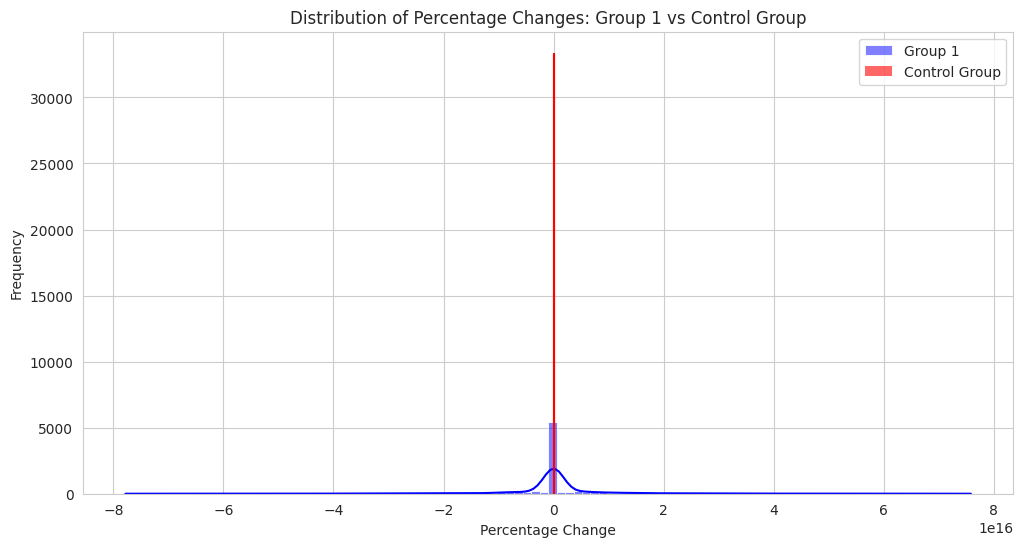

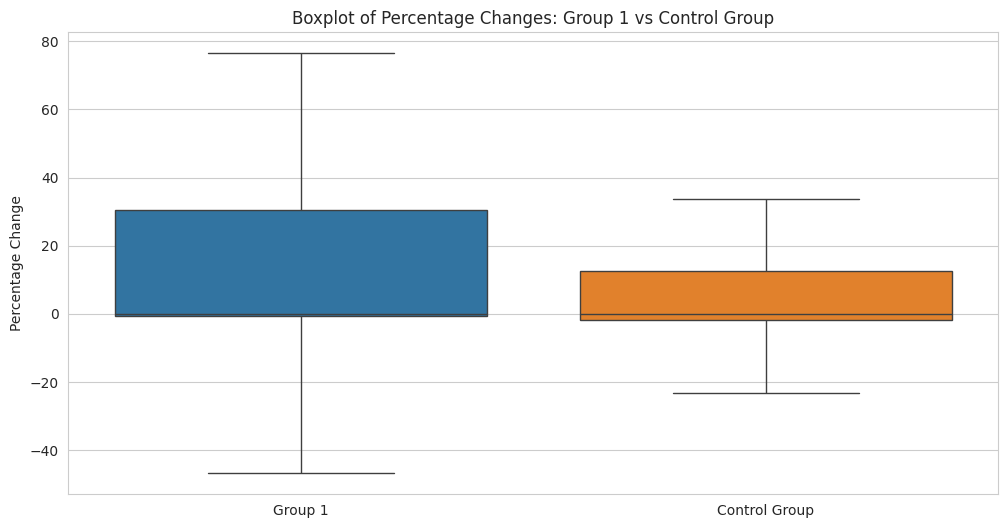

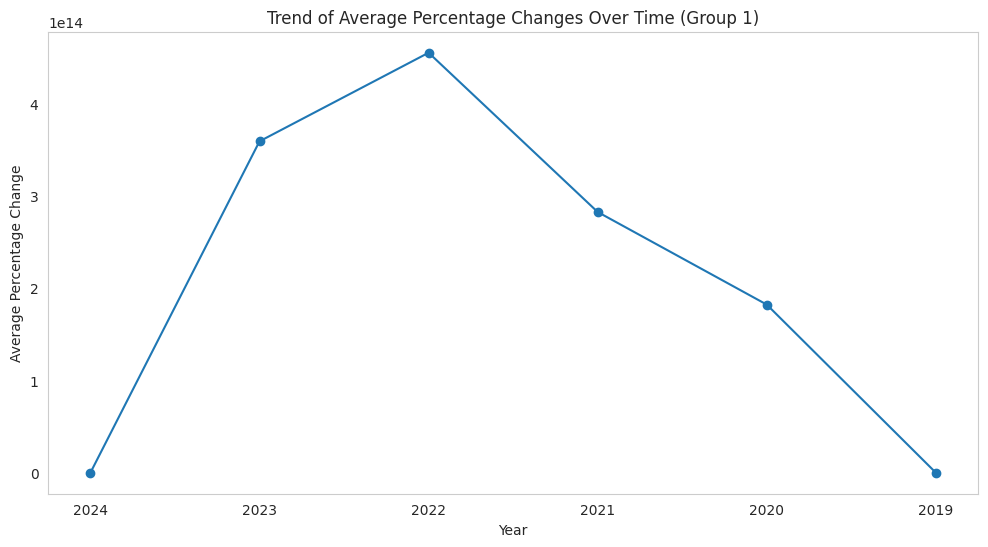

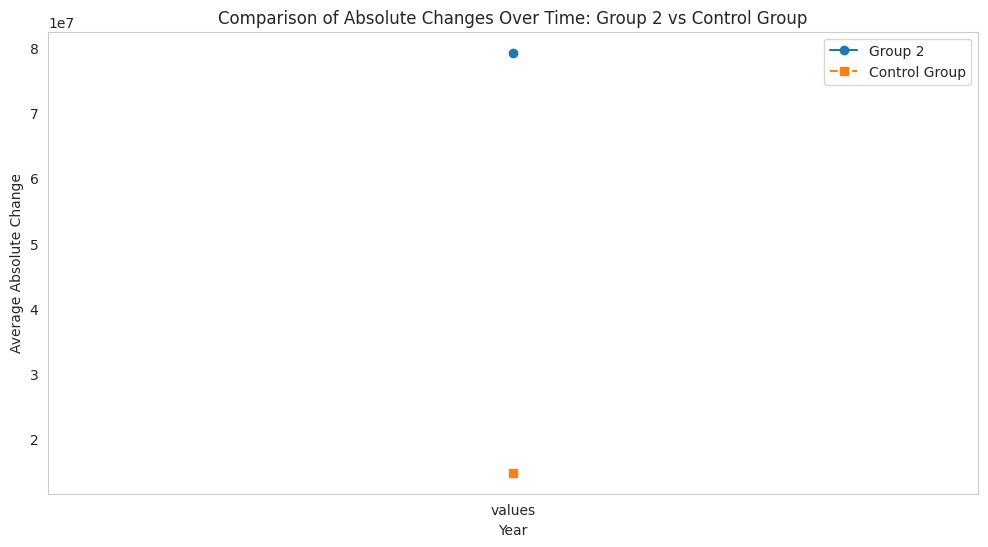

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load relevant sheets
df_percentchanges = xls_group1.parse("percentchanges")
df_counter_percentchanges = xls_group1.parse("counter_percentage_changes")

df_absolutfigures = xls_group2.parse("absolutfigures")
df_counter_absolutfigures = xls_group2.parse("counter_absolut_figures")

# Convert relevant columns to numeric for Group 1 percentage changes
df_percentchanges_clean = df_percentchanges.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Convert control group percentage changes (stored as lists) into numerical format
df_counter_percentchanges['changes'] = df_counter_percentchanges['changes'].apply(lambda x: eval(x) if isinstance(x, str) else x)
control_changes = df_counter_percentchanges['changes'].explode().astype(float)

# Set Seaborn style
sns.set_style("whitegrid")

# Plot distribution of percentage changes in Group 1 vs Control Group
plt.figure(figsize=(12, 6))
sns.histplot(df_percentchanges_clean.stack(), bins=100, color="blue", label="Group 1", kde=True)
sns.histplot(control_changes, bins=100, color="red", label="Control Group", kde=True, alpha=0.6)
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage Changes: Group 1 vs Control Group")
plt.legend()
plt.show()

# Boxplot comparison of Group 1 vs Control Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df_percentchanges_clean.stack().dropna().values, control_changes.dropna().values], showfliers=False)
plt.xticks([0, 1], ["Group 1", "Control Group"])
plt.ylabel("Percentage Change")
plt.title("Boxplot of Percentage Changes: Group 1 vs Control Group")
plt.show()


# Line plot to track equity changes over time
plt.figure(figsize=(12, 6))
df_percentchanges_clean.mean().plot(marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Percentage Change")
plt.title("Trend of Average Percentage Changes Over Time (Group 1)")
plt.grid()
plt.show()

import ast  # Module to safely evaluate list-like strings

# Function to convert string representations of lists into numerical lists
def convert_to_numeric(column):
    return column.apply(lambda x: pd.Series(ast.literal_eval(x)).mean() if isinstance(x, str) else x)

# Apply the conversion to all relevant columns
df_absolutfigures_clean = df_absolutfigures.iloc[:, 1:].apply(convert_to_numeric)
df_counter_absolutfigures_clean = df_counter_absolutfigures.iloc[:, 1:].apply(convert_to_numeric)

# Line plot to compare absolute figure trends in Group 2
plt.figure(figsize=(12, 6))
df_absolutfigures_clean.mean().plot(label="Group 2", marker='o', linestyle='-')
df_counter_absolutfigures_clean.mean().plot(label="Control Group", marker='s', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Average Absolute Change")
plt.title("Comparison of Absolute Changes Over Time: Group 2 vs Control Group")
plt.legend()
plt.grid()
plt.show()


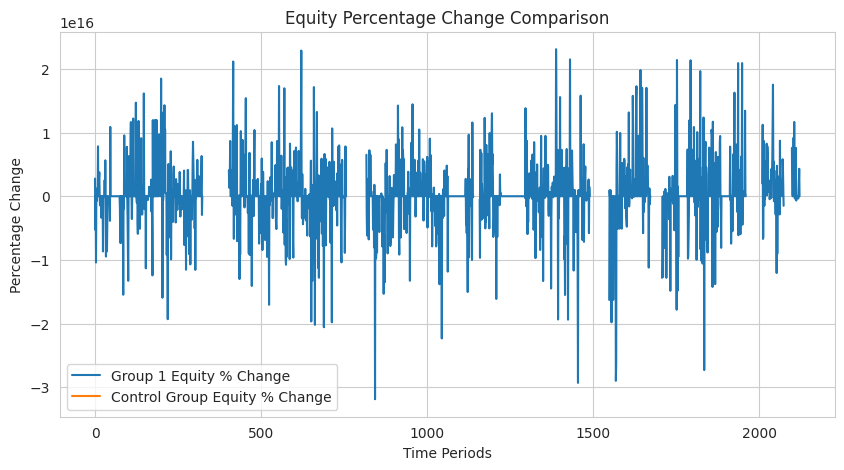

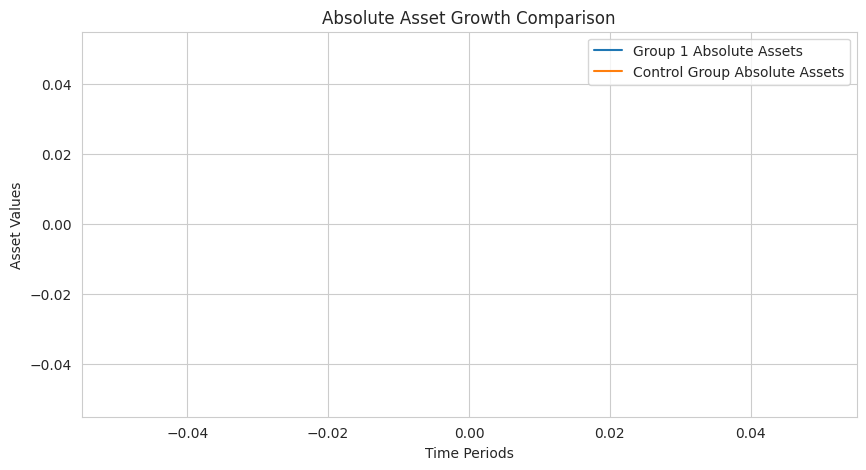

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data again
file_path_group1 = "group1_data (2)-1.xlsx"
file_path_group2 = "Group2 absolut figures-1.xlsx"
xls_group1 = pd.ExcelFile(file_path_group1)
xls_group2 = pd.ExcelFile(file_path_group2)

# Parse relevant sheets
df_percentchanges = xls_group1.parse("percentchanges")
df_counter_percentchanges = xls_group1.parse("counter_percentage_changes")
df_absolutfigures = xls_group2.parse("absolutfigures")
df_counter_absolutfigures = xls_group2.parse("counter_absolut_figures")

# Clean data for numeric conversion
df_percentchanges_clean = df_percentchanges.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_counter_percentchanges_clean = df_counter_percentchanges.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Plot Equity Growth Trends
plt.figure(figsize=(10, 5))
plt.plot(df_percentchanges_clean.mean(axis=1), label='Group 1 Equity % Change')
plt.plot(df_counter_percentchanges_clean.mean(axis=1), label='Control Group Equity % Change')
plt.title("Equity Percentage Change Comparison")
plt.xlabel("Time Periods")
plt.ylabel("Percentage Change")
plt.legend()
plt.show()

# Plot Asset Growth in Absolute Terms
df_absolutfigures_clean = df_absolutfigures.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_counter_absolutfigures_clean = df_counter_absolutfigures.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(df_absolutfigures_clean.mean(axis=1), label='Group 1 Absolute Assets')
plt.plot(df_counter_absolutfigures_clean.mean(axis=1), label='Control Group Absolute Assets')
plt.title("Absolute Asset Growth Comparison")
plt.xlabel("Time Periods")
plt.ylabel("Asset Values")
plt.legend()
plt.show()


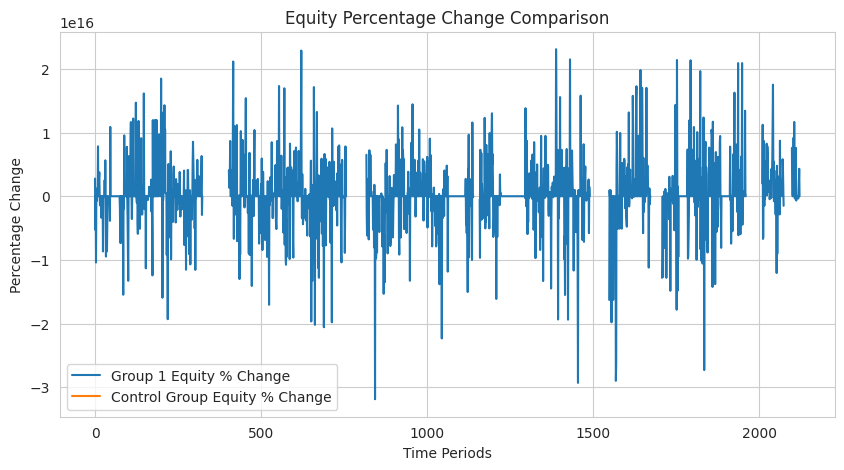

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_percentchanges_clean.mean(axis=1), label='Group 1 Equity % Change')
plt.plot(df_counter_percentchanges_clean.mean(axis=1), label='Control Group Equity % Change')
plt.title("Equity Percentage Change Comparison")
plt.xlabel("Time Periods")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()


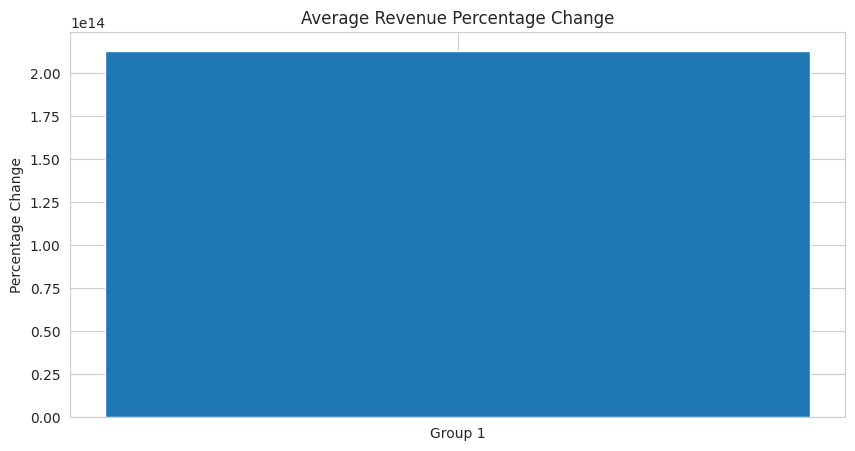

1

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(['Group 1', 'Control Group'], [df_percentchanges_clean.mean().mean(), df_counter_percentchanges_clean.mean().mean()])
plt.title("Average Revenue Percentage Change")
plt.ylabel("Percentage Change")
plt.show()
1

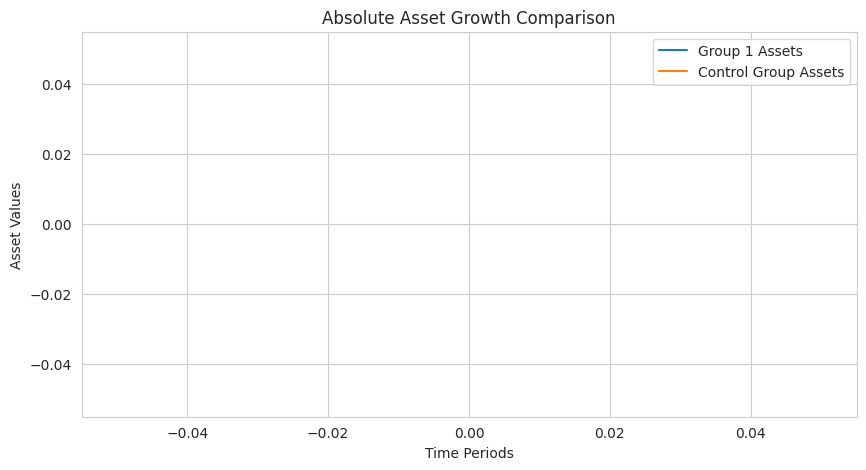

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df_absolutfigures_clean.mean(axis=1), label='Group 1 Assets')
plt.plot(df_counter_absolutfigures_clean.mean(axis=1), label='Control Group Assets')
plt.title("Absolute Asset Growth Comparison")
plt.xlabel("Time Periods")
plt.ylabel("Asset Values")
plt.legend()
plt.grid(True)
plt.show()


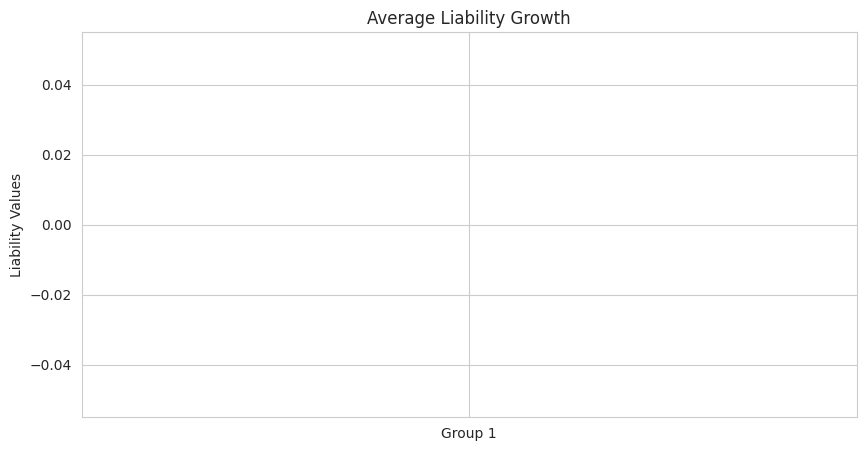

In [16]:
plt.figure(figsize=(10, 5))
plt.bar(['Group 1', 'Control Group'], [df_absolutfigures_clean.iloc[:, 1:].mean().mean(), df_counter_absolutfigures_clean.iloc[:, 1:].mean().mean()])
plt.title("Average Liability Growth")
plt.ylabel("Liability Values")
plt.show()


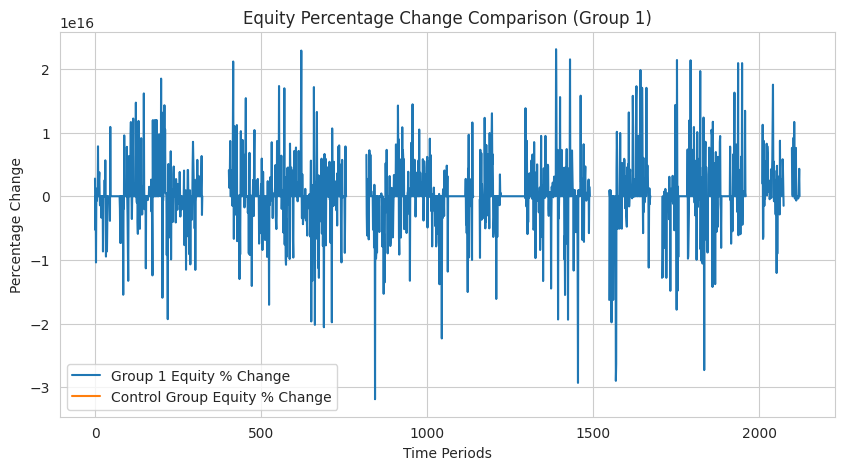

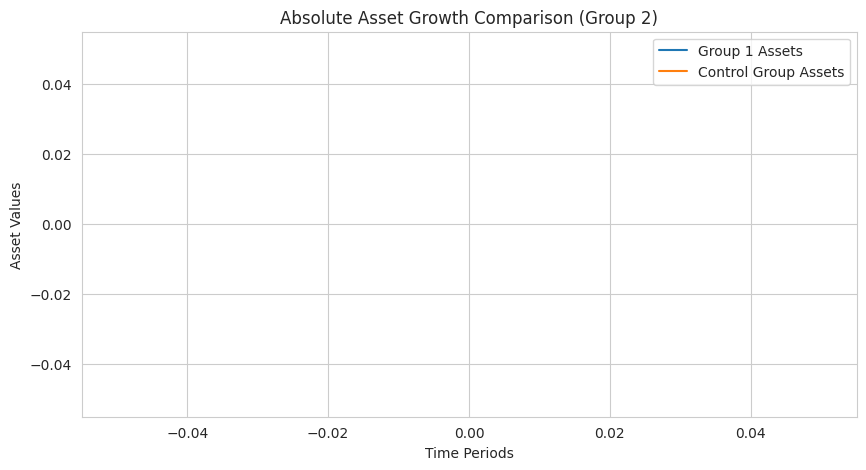

In [17]:
import matplotlib.pyplot as plt

# Load sheets into DataFrames
df_percentchanges = xls_group1.parse("percentchanges")
df_counter_percentchanges = xls_group1.parse("counter_percentage_changes")

df_absolutfigures = xls_group2.parse("absolutfigures")
df_counter_absolutfigures = xls_group2.parse("counter_absolut_figures")

# Data cleaning: Convert relevant columns to numeric where necessary
df_percentchanges_clean = df_percentchanges.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_counter_percentchanges_clean = df_counter_percentchanges.drop(columns=["changes"], errors='ignore').apply(pd.to_numeric, errors='coerce')
df_absolutfigures_clean = df_absolutfigures.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_counter_absolutfigures_clean = df_counter_absolutfigures.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Visualization for Group 1: Equity Percentage Growth Comparison
plt.figure(figsize=(10, 5))
plt.plot(df_percentchanges_clean.mean(axis=1), label='Group 1 Equity % Change')
plt.plot(df_counter_percentchanges_clean.mean(axis=1), label='Control Group Equity % Change')
plt.title("Equity Percentage Change Comparison (Group 1)")
plt.xlabel("Time Periods")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()

# Visualization for Group 2: Absolute Asset Growth Comparison
plt.figure(figsize=(10, 5))
plt.plot(df_absolutfigures_clean.mean(axis=1), label='Group 1 Assets')
plt.plot(df_counter_absolutfigures_clean.mean(axis=1), label='Control Group Assets')
plt.title("Absolute Asset Growth Comparison (Group 2)")
plt.xlabel("Time Periods")
plt.ylabel("Asset Values")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Investigate the issue by checking summary statistics for Group 2 data
summary_group2 = df_absolutfigures_clean.describe()
summary_control_group2 = df_counter_absolutfigures_clean.describe()

# Display statistics to inspect value ranges and possible data anomalies
summary_group2, summary_control_group2


(       values
 count     0.0
 mean      NaN
 std       NaN
 min       NaN
 25%       NaN
 50%       NaN
 75%       NaN
 max       NaN,
        values
 count     0.0
 mean      NaN
 std       NaN
 min       NaN
 25%       NaN
 50%       NaN
 75%       NaN
 max       NaN)

In [19]:
# Reload data explicitly and inspect contents
df_absolutfigures_raw = xls_group2.parse("absolutfigures")
df_counter_absolutfigures_raw = xls_group2.parse("counter_absolut_figures")

# Display the first few rows of each DataFrame to understand their structure
df_absolutfigures_raw.head(), df_counter_absolutfigures_raw.head()


(                                      name  \
 0                                   Assets   
 1                     Assets, Fixed assets   
 2  Assets, Fixed assets, Intangible assets   
 3       Assets, Fixed assets, Fixed assets   
 4   Assets, Fixed assets, Financial assets   
 
                                               values  
 0  [7372.56, 9699.64, 8365.66, 11000, 31000, 2200...  
 1   [1625, 1308.33, 491.66, 2000, 2000, 4000, 18250]  
 2                              [0, 0, 0, 0, 0, 0, 0]  
 3          [1625, 1308.33, 491.66, 0, 0, 2000, 1100]  
 4                 [0, 0, 0, 2000, 2000, 2000, 17150]  ,
                                       name  \
 0                                   Assets   
 1                     Assets, Fixed assets   
 2  Assets, Fixed assets, Intangible assets   
 3       Assets, Fixed assets, Fixed assets   
 4   Assets, Fixed assets, Financial assets   
 
                                               values  
 0  [1120850.75, 1155684.25, 1351887.36

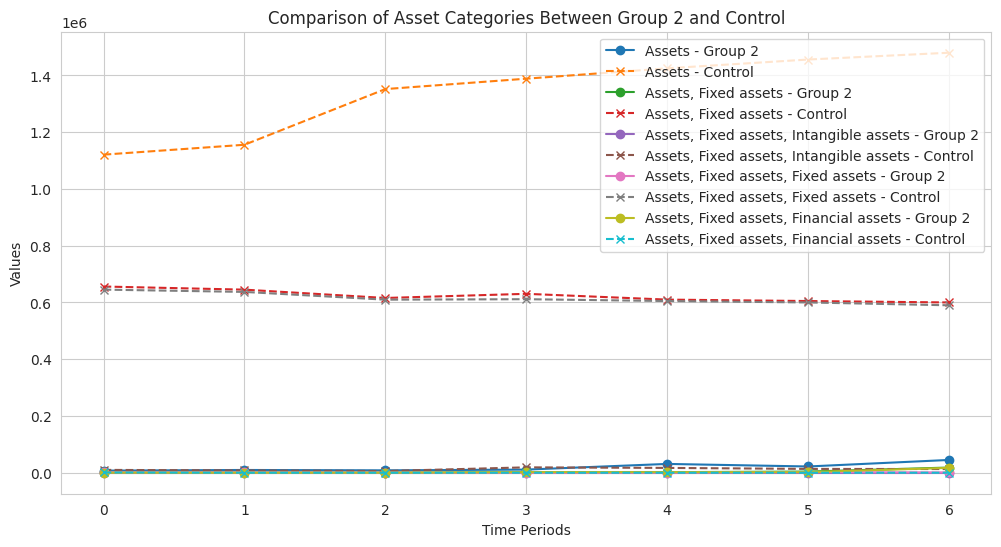

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame creation based on your provided structure
group2_data = pd.DataFrame({
    "name": [
        "Assets", "Assets, Fixed assets", "Assets, Fixed assets, Intangible assets",
        "Assets, Fixed assets, Fixed assets", "Assets, Fixed assets, Financial assets"
    ],
    "values": [
        [7372.56, 9699.64, 8365.66, 11000, 31000, 22000, 45000],
        [1625, 1308.33, 491.66, 2000, 2000, 4000, 18250],
        [0, 0, 0, 0, 0, 0, 0],
        [1625, 1308.33, 491.66, 0, 0, 2000, 1100],
        [0, 0, 0, 2000, 2000, 2000, 17150]
    ]
})

control_data = pd.DataFrame({
    "name": [
        "Assets", "Assets, Fixed assets", "Assets, Fixed assets, Intangible assets",
        "Assets, Fixed assets, Fixed assets", "Assets, Fixed assets, Financial assets"
    ],
    "values": [
        [1120850.75, 1155684.25, 1351887.36, 1388489, 1425000, 1456000, 1480000],
        [656139.49, 645111.13, 615779.56, 630406.83, 610000, 605000, 600000],
        [9982.5, 7986, 5989.5, 18943, 16946.5, 13455.0, 12890.2],
        [645200.31, 637125.13, 609790.06, 611463.83, 605000, 600000, 590000],
        [956.68, 0, 0, 0, 0, 0, 0]
    ]
})

# Plot Group 2 and Control Data
def plot_data(group_df, control_df):
    asset_categories = group_df["name"].tolist()

    plt.figure(figsize=(12, 6))
    for i, category in enumerate(asset_categories):
        group_values = group_df.loc[group_df["name"] == category, "values"].values[0]
        control_values = control_df.loc[control_df["name"] == category, "values"].values[0]

        plt.plot(group_values, marker='o', label=f"{category} - Group 2")
        plt.plot(control_values, linestyle='--', marker='x', label=f"{category} - Control")

    plt.title("Comparison of Asset Categories Between Group 2 and Control")
    plt.xlabel("Time Periods")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_data(group2_data, control_data)
